<a href="https://colab.research.google.com/github/Nhatnguyen2001/AI_Exercise/blob/main/FASHION_MNIST_CNN_WEEK14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORT LIBRARY

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Optimizer
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

2. LOAD DATA

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

3. PROCESSING DATA

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


4. CREATE MODEL

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

5. TRAINING MODEL

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128, epochs = 10,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 171s 363ms/step - loss: 1.1195 - accuracy: 0.5842 - val_loss: 0.5225 - val_accuracy: 0.8253
Epoch 2/10
469/469 [==============================] - 152s 324ms/step - loss: 0.7396 - accuracy: 0.7151 - val_loss: 0.4194 - val_accuracy: 0.8494
Epoch 3/10
469/469 [==============================] - 149s 318ms/step - loss: 0.6570 - accuracy: 0.7499 - val_loss: 0.4046 - val_accuracy: 0.8583
Epoch 4/10
469/469 [==============================] - 153s 326ms/step - loss: 0.6002 - accuracy: 0.7707 - val_loss: 0.3832 - val_accuracy: 0.8716
Epoch 5/10
469/469 [==============================] - 149s 317ms/step - loss: 0.5704 - accuracy: 0.7849 - val_loss: 0.3591 - val_accuracy: 0.8824
Epoch 6/10
469/469 [==============================] - 149s 317ms/step - loss: 0.5395 - accuracy: 0.7962 - val_loss: 0.3473 - val_accuracy: 0.8840
Epoch 7/10
469/469 [==============================] - 149s 317ms/step - loss: 0.5216 - accuracy: 0.8028 - val_loss: 0.3227 -

6. DRAWING MODEL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


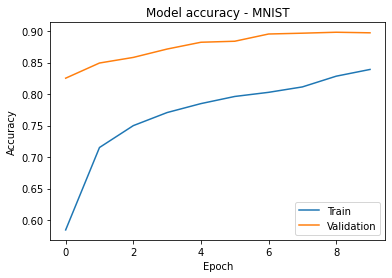

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

7. SAVE MODEL

In [ ]:
model.save('FASHION_MNIST.h5')